## MNIST Classification Example

This section covers the third chapter of the O'Reilly book, and covers classification of hand-drawn digits.

First we'll start by importing the datasets from the existing SKLearn datasets

In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Now that the data is downloaded, we'll check to see what the data looks like.

In [6]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


5.0


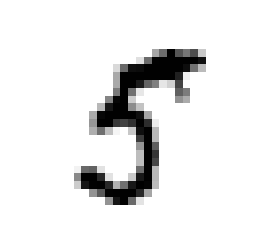

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36001]
some_digit_image = some_digit.reshape(28, 28)

print(y[36001])

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#### Creating Test and Training Splits

Since we'll be wanting to assess how well the model performs, we'll be splitting up the dataset into a training and test set.  We'll be training on the first 60,000 items, and then leave the last 10,000 for testing.  Since we want to avoid training on sequential items, we'll be shuffling the indeces at the end of this cell

In [14]:
# Create test and training sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000]

# Shuffle the training sets, prevents model from being impacted by having sequential items to train on
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Training a Binary Classifier

The first step in our model exploration is building a classifier to distinguish between binary states, either determining that a particular input either is or is not a particular digit.  In our example, we'll be creating a classifier to detect whether an input image is a 5 or not.